In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from textblob import Word , TextBlob
from wordcloud import WordCloud

In [ ]:
zomoto = pd.read_csv('/content/zomato_reviews.csv')
zomoto.head()

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [ ]:
zomoto.shape

(5479, 3)

In [ ]:
zomoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5479 non-null   int64 
 1   rating      5479 non-null   int64 
 2   review      5478 non-null   object
dtypes: int64(2), object(1)
memory usage: 128.5+ KB


#no null value can be seen

In [ ]:
zomoto.describe()

,Unnamed: 0,rating
count,5479.000000,5479.000000
mean,2739.000000,3.161343
std,1581.795393,1.782197
min,0.000000,1.000000
25%,1369.500000,1.000000
50%,2739.000000,4.000000
75%,4108.500000,5.000000
max,5478.000000,5.000000


In [ ]:
zomoto['review']

0                                                    nice
1       best biryani , so supportive staff of outlet ,...
2          delivery boy was very decent and supportive.👌👍
3       worst biryani i have tasted in my life, half o...
4       all food is good and tasty . will order again ...
                              ...                        
5474                                             complain
5475    it took 1 hour to assign valvet and thn prepar...
5476    took for an hour to prepare 3 khawsa, which in...
5477    very very late, littrally did time pass and it...
5478    Taste was stale and they give only 5 pieces in...
Name: review, Length: 5479, dtype: object

In [ ]:
#lowering the text
zomoto['review'] = zomoto['review'].str.lower()

In [ ]:
#removing punctuations
zomoto['review'] = zomoto['review'].str.replace('[^\w\s]','')

<ipython-input-19-828f17739659>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  zomoto['review'] = zomoto['review'].str.replace('[^\w\s]','')


In [ ]:
#removing number
zomoto['review'] = zomoto['review'].str.replace('\d','')

<ipython-input-20-98457fdaa426>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  zomoto['review'] = zomoto['review'].str.replace('\d','')


In [ ]:
zomoto.head()

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,best biryani so supportive staff of outlet p...
2,2,4,delivery boy was very decent and supportive
3,3,1,worst biryani i have tasted in my life half of...
4,4,5,all food is good and tasty will order again a...


In [ ]:
#stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
zomoto['review'] = zomoto['review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))

In [ ]:
#tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
zomoto["review"].apply(lambda x: TextBlob(x).words).head()

0                                               [nice]
1    [best, biryani, supportive, staff, outlet, per...
2                  [delivery, boy, decent, supportive]
3    [worst, biryani, tasted, life, half, biryani, ...
4    [food, good, tasty, order, lots, explore, bawa...
Name: review, dtype: object

In [ ]:
#lemmatization
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
zomoto['review'] = zomoto['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
zomoto['review'].head(10)

0                                                 nice
1    best biryani supportive staff outlet personali...
2                       delivery boy decent supportive
3       worst biryani tasted life half biryani dustbin
4     food good tasty order lot explore bawarchis menu
5    shandar zabardast zindabad good going bawarchi...
6                        overall good experience order
7                                       good cold food
8                tasty food homestyle tasty prepration
9                                                loved
Name: review, dtype: object

In [ ]:
#term frequeny
term_freq = zomoto["review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
term_freq.columns = ["words", "term_frequeny"]
term_freq.head(20)

,words,term_frequeny
0,nice,291.0
1,best,256.0
2,biryani,108.0
3,supportive,4.0
4,staff,52.0
5,outlet,12.0
6,personalize,1.0
7,order,562.0
8,call,31.0
9,say,34.0


In [ ]:
term_freq["term_frequeny"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count    5409.000000
mean        6.836569
std        31.853102
min         1.000000
5%          1.000000
10%         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
80%         4.000000
90%        12.000000
95%        25.000000
99%        91.920000
max      1112.000000
Name: term_frequeny, dtype: float64

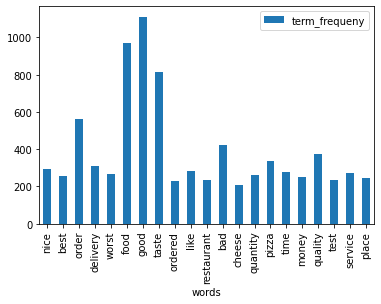

In [ ]:
# Barplot
term_freq[term_freq["term_frequeny"] > 200].plot.bar(x="words", y="term_frequeny")
plt.show()

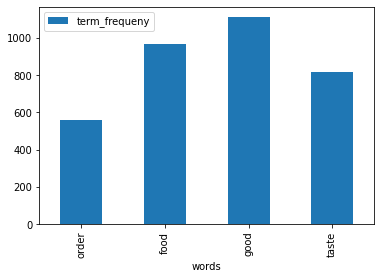

In [ ]:
term_freq[term_freq["term_frequeny"] > 500].plot.bar(x="words", y="term_frequeny")
plt.show()

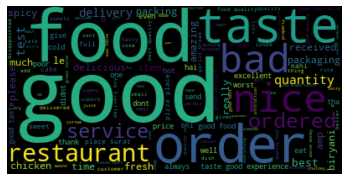

In [ ]:
# Wordcloud

text = " ".join(i for i in zomoto.review)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#using vader which is a pre-trained sentiment analyzer
nltk.download('vader_lexicon')
sia  = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#checking the polarity in the sentence
#for ex:
sia.polarity_scores("kanye west is the greatest artist alive")

{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.7783}

In [ ]:
#converting the text to upper case
zomoto['review'].apply(lambda x : x.upper())

0                                                    NICE
1       BEST BIRYANI SUPPORTIVE STAFF OUTLET PERSONALI...
2                          DELIVERY BOY DECENT SUPPORTIVE
3          WORST BIRYANI TASTED LIFE HALF BIRYANI DUSTBIN
4        FOOD GOOD TASTY ORDER LOT EXPLORE BAWARCHIS MENU
                              ...                        
5474                                             COMPLAIN
5475    TOOK HOUR ASSIGN VALVET THN PREPARE FOOD LIKE ...
5476    TOOK HOUR PREPARE KHAWSA REAL LIFE GET PREPARE...
5477                  LATE LITTRALLY TIME PAS ITEM PROPER
5478    TASTE STALE GIVE PIECE R PLEASE CHEAT ONLINE C...
Name: review, Length: 5479, dtype: object

In [ ]:
#applying the polarity fun to first 10 rows
zomoto["review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...
2    {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...
3    {'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'comp...
4    {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...
5    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
6    {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...
7    {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
Name: review, dtype: object

In [ ]:
#just having the compund value of polarityzomto
zomoto["review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])


0    0.4215
1    0.7506
2    0.2960
3   -0.6249
4    0.4404
5    0.4404
6    0.4404
7    0.4404
8    0.0000
9    0.5994
Name: review, dtype: float64

In [ ]:
#making a new column having compund value of polarity
zomoto["polarity_score"] = zomoto["review"].apply(lambda x: sia.polarity_scores(x)["compound"])
zomoto.head()

,Unnamed: 0,rating,review,polarity_score
0,0,5,nice,0.4215
1,1,5,best biryani supportive staff outlet personali...,0.7506
2,2,4,delivery boy decent supportive,0.2960
3,3,1,worst biryani tasted life half biryani dustbin,-0.6249
4,4,5,food good tasty order lot explore bawarchis menu,0.4404


In [ ]:
#if compound value greater than 0 print positive else negative
zomoto["review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    pos
6    pos
7    pos
8    neg
9    pos
Name: review, dtype: object

In [ ]:
#adding the above condition satement to the dataset as 'sentiment_label'
zomoto["sentiment_zomoto_user"] = zomoto["review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
zomoto.head()

,Unnamed: 0,rating,review,polarity_score,sentiment_label,sentiment_zomoto_user
0,0,5,nice,0.4215,pos,pos
1,1,5,best biryani supportive staff outlet personali...,0.7506,pos,pos
2,2,4,delivery boy decent supportive,0.2960,pos,pos
3,3,1,worst biryani tasted life half biryani dustbin,-0.6249,neg,neg
4,4,5,food good tasty order lot explore bawarchis menu,0.4404,pos,pos


In [ ]:
#finding the mean of the column
zomoto.groupby("sentiment_label")["rating"].mean()

sentiment_label
neg    3.151206
pos    3.173107
Name: rating, dtype: float64

In [ ]:
zomoto["sentiment_label"] = LabelEncoder().fit_transform(zomoto["sentiment_label"])

X = zomoto["review"]
Y = zomoto["sentiment_label"]

In [ ]:
X.head() , Y.head()

(0                                                 nice
 1    best biryani supportive staff outlet personali...
 2                       delivery boy decent supportive
 3       worst biryani tasted life half biryani dustbin
 4     food good tasty order lot explore bawarchis menu
 Name: review, dtype: object, 0    1
 1    1
 2    1
 3    0
 4    1
 Name: sentiment_label, dtype: int64)